## **SAISH DATTA MUSINADA** 

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sn

# READ DATA


In [35]:
GT_data=pd.read_csv('/content/sample_data/globalterrorism.csv',encoding='latin1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
GT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [38]:
pd.set_option("display.max_columns",None)

In [122]:
GT_data.sample(3)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,geometry
77937,200504200004,2005,4,20,0,6,Algeria,10,Middle East & North Africa,44,33067,36.159589,1.612265,1.0,0,1,1,1,1.0,0.0,1,0,9,Unknown,14,Private Citizens & Property,71.0,Race/Ethnicity Identified,6519,67025,6.0,Algeria,3408,0.0,0,NaN,0.0,0.0,13,Unknown,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0,0.0,CETIS,-9,-9,0,-9,POINT (1.61227 36.15959)
58745,199503120006,1995,3,12,0,153,Pakistan,6,South Asia,2325,16058,24.891115,67.143311,1.0,0,1,1,1,-9.0,1.0,1,0,1,Assassination,14,Private Citizens & Property,84.0,Political Party Member/Rally,18168,7486,153.0,Pakistan,3408,0.0,0,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,PGIS,-9,-9,0,-9,POINT (67.14331 24.89111)
179270,201709290016,2017,9,29,0,182,Somalia,11,Sub-Saharan Africa,1440,4005,2.047631,44.897629,1.0,0,1,1,0,1.0,1.0,1,1,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,27223,13236,182.0,Somalia,177,0.0,0,-99.0,0.0,1.0,6,Explosives,15.0,Vehicle,12.0,0.0,9.0,NaN,0.0,NaN,-9,0.0,START Primary Collection,0,0,0,0,POINT (44.89763 2.04763)


# Handling Null Values 

In [40]:
col_null_values = GT_data.isnull().sum()
for key,value in col_null_values.iteritems():
    print(key,",",value)

eventid , 0
iyear , 0
imonth , 0
iday , 0
approxdate , 172452
extended , 0
resolution , 179471
country , 0
country_txt , 0
region , 0
region_txt , 0
provstate , 421
city , 434
latitude , 4556
longitude , 4557
specificity , 6
vicinity , 0
location , 126196
summary , 66129
crit1 , 0
crit2 , 0
crit3 , 0
doubtterr , 1
alternative , 152680
alternative_txt , 152680
multiple , 1
success , 0
suicide , 0
attacktype1 , 0
attacktype1_txt , 0
attacktype2 , 175377
attacktype2_txt , 175377
attacktype3 , 181263
attacktype3_txt , 181263
targtype1 , 0
targtype1_txt , 0
targsubtype1 , 10373
targsubtype1_txt , 10373
corp1 , 42550
target1 , 636
natlty1 , 1559
natlty1_txt , 1559
targtype2 , 170547
targtype2_txt , 170547
targsubtype2 , 171006
targsubtype2_txt , 171006
corp2 , 171574
target2 , 170671
natlty2 , 170863
natlty2_txt , 170863
targtype3 , 180515
targtype3_txt , 180515
targsubtype3 , 180594
targsubtype3_txt , 180594
corp3 , 180665
target3 , 180516
natlty3 , 180544
natlty3_txt , 180544
gname , 0
gsu

In [41]:
#Deleting columns which has more than 90% of null data
GT_data.drop(['approxdate',
'resolution',
'alternative',
'attacktype2',
'attacktype3',
'targtype2',
'location',
'targsubtype2',
'corp2',
'target2',
'natlty2',
'targtype3',
'targsubtype3',
'corp3',
'target3',
'natlty3',
'gsubname',
'gname2',
'gsubname2',
'gname3',
'gsubname3',
'guncertain2',
'guncertain3',
'claimmode',
'claim2',
'claimmode2',
'claim3',
'claimmode3',
'compclaim',
'weaptype2',
'weapsubtype2',
'weaptype3',
'weapsubtype3',
'weaptype4',
'weapsubtype4',
'propvalue',
'nhostkid',
'nhostkidus',
'nhours',
'ndays',
'divert',
'kidhijcountry',
'ransomamt',
'ransomamtus',
'ransompaid',
'ransompaidus',
'ransomnote',
'hostkidoutcome',
'nreleased',
'addnotes',
'scite2',
'scite3',
'related'],axis=1,inplace=True)
# Deleting columns which has more than 60% of null values
GT_data.drop(['ransom','motive','propextent','propcomment','summary','weapdetail','scite1'],axis=1,inplace=True)

GT_data.drop(['hostkidoutcome_txt','propextent_txt','weaptype2_txt',
'weapsubtype2_txt','weaptype3_txt','weapsubtype3_txt','weaptype4_txt',
'weapsubtype4_txt','claimmode_txt','claimmode2_txt','claimmode3_txt',
'alternative_txt','attacktype2_txt','attacktype3_txt','targtype2_txt',
'targsubtype2_txt','natlty2_txt','targtype3_txt','targsubtype3_txt',
'natlty3_txt'],axis=1,inplace=True)

In [42]:
GT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [120]:
GT_data.sample(3)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,geometry
181094,201712060004,2017,12,6,0,95,Iraq,10,Middle East & North Africa,211,3042,33.303566,44.371773,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,74.0,Marketplace/Plaza/Square,31004,44013,95.0,Iraq,3408,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,0.0,5.0,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9,POINT (44.37177 33.30357)
160709,201604020029,2016,4,2,0,92,India,6,South Asia,531,31971,18.391360,81.658561,3.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,20,Unknown,NaN,NaN,31004,76741,92.0,India,3408,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,START Primary Collection,-9,-9,0,-9,POINT (81.65856 18.39136)
31100,198705250005,1987,5,25,0,159,Peru,3,South America,134,7103,-14.295196,-73.242300,3.0,0,1,1,1,0.0,1.0,1,0,3,Bombing/Explosion,19,Transportation,103.0,Bridge/Car Tunnel,31004,14322,159.0,Peru,2948,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,PGIS,0,0,0,0,POINT (-73.24230 -14.29520)


In [44]:
# Making null values to unknown
cols=['provstate','city',
'corp1','target1','gname',
'dbsource']
for i in cols:
    print('For the Column #####'+i+'#####')
    print('Total null values are    '+str(GT_data[i].isnull().sum()))
    print('Total UnKnown Values are '+str(GT_data[i][GT_data[i]=='Unknown'].count()))
    GT_data[i].fillna(value='Unknown',inplace=True)
    print('After merging null values the total Unknown Values are '+str(GT_data[i][GT_data[i]=='Unknown'].count()))

For the Column #####provstate#####
Total null values are    421
Total UnKnown Values are 4290
After merging null values the total Unknown Values are 4711
For the Column #####city#####
Total null values are    434
Total UnKnown Values are 9775
After merging null values the total Unknown Values are 10209
For the Column #####corp1#####
Total null values are    42550
Total UnKnown Values are 16356
After merging null values the total Unknown Values are 58906
For the Column #####target1#####
Total null values are    636
Total UnKnown Values are 5918
After merging null values the total Unknown Values are 6554
For the Column #####gname#####
Total null values are    0
Total UnKnown Values are 82782
After merging null values the total Unknown Values are 82782
For the Column #####dbsource#####
Total null values are    0
Total UnKnown Values are 0
After merging null values the total Unknown Values are 0


# Insights and visualization

In [45]:
def Barplot_Terrorist_attacks(ColumnName,color):
    dup_val=GT_data.pivot_table(index=[ColumnName],aggfunc='size')
    dup_val=dup_val.sort_values(ascending=False)
    dup_val=dup_val.head(20)
    for key,value in dup_val.head(5).iteritems():
        print(str(key)+','+str(value))
    plt.figure(figsize=(15,8))
    plt.bar(pd.Series(dup_val.index),pd.Series(dup_val.values),color=color)
    plt.xticks(dup_val.index,fontsize=15, rotation=90)
    plt.yticks(fontsize=15)
    plt.xlabel(ColumnName,fontsize=20)
    plt.ylabel('No. of Attacks',fontsize=20)
    plt.title(ColumnName+ ' Terrorist Attacks ',fontsize=26)
    plt.show()
        

Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639


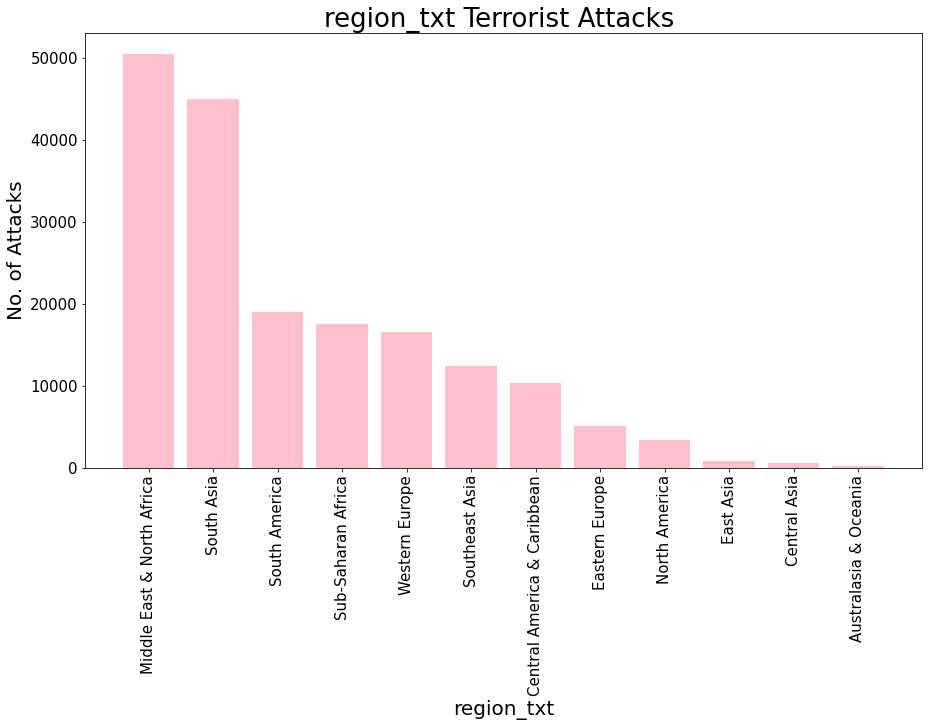

In [46]:
Barplot_Terrorist_attacks('region_txt','pink')

Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306


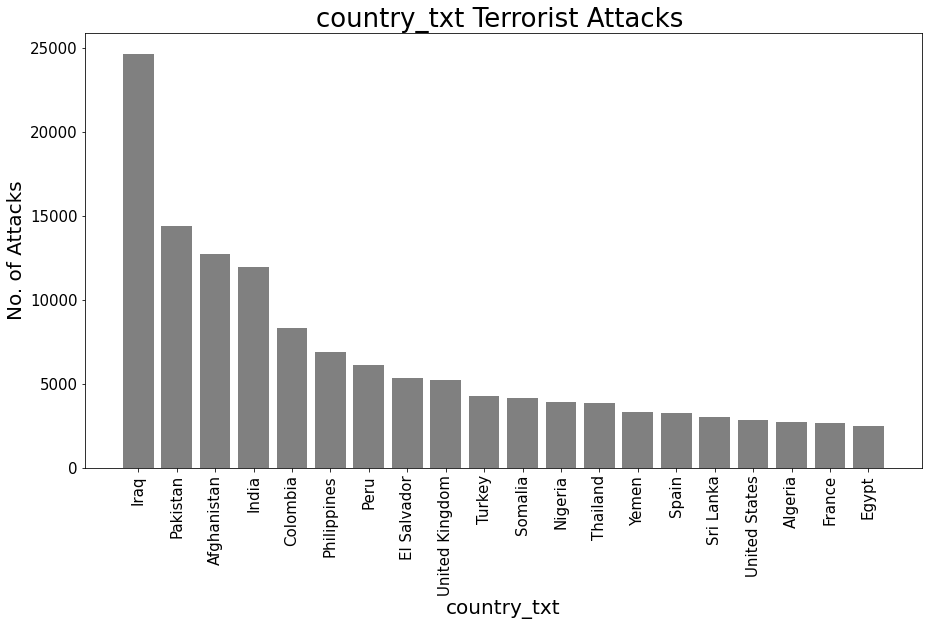

In [47]:
Barplot_Terrorist_attacks('country_txt','grey')

Unknown,10209
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265


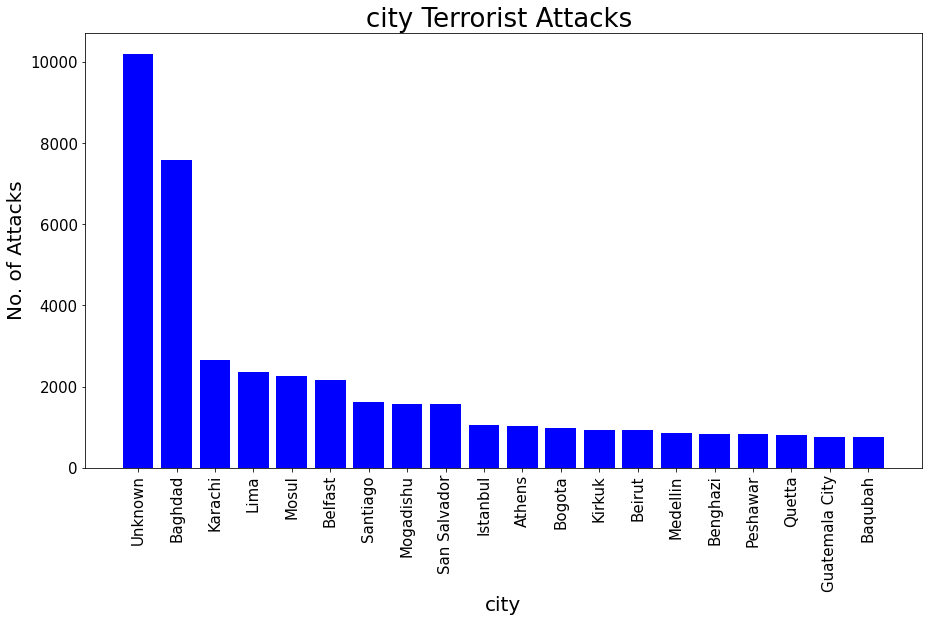

In [48]:
Barplot_Terrorist_attacks('city','blue')

Unknown,6554
Civilians,6461
Soldiers,3157
Patrol,2942
Checkpoint,2905


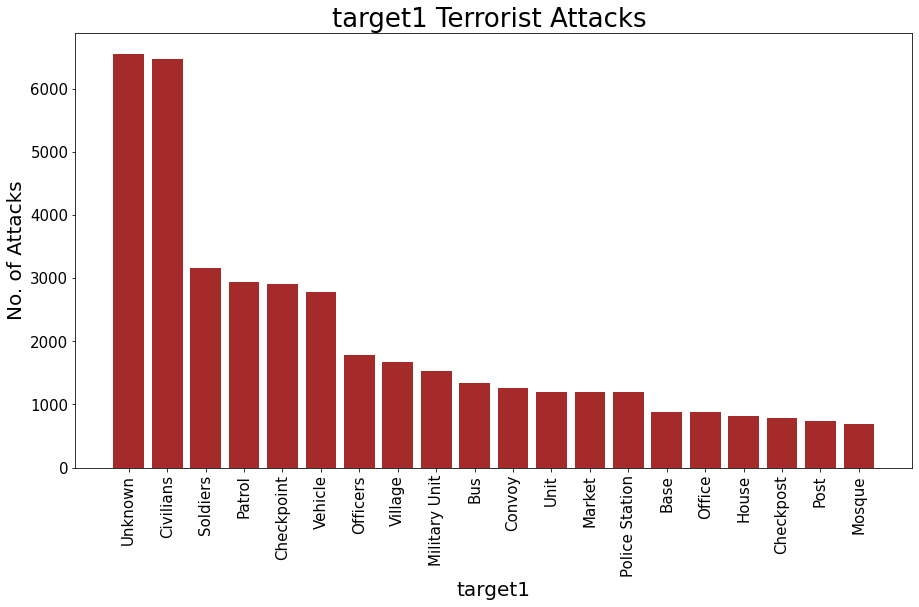

In [49]:
Barplot_Terrorist_attacks('target1','brown')

Unknown,82782
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351


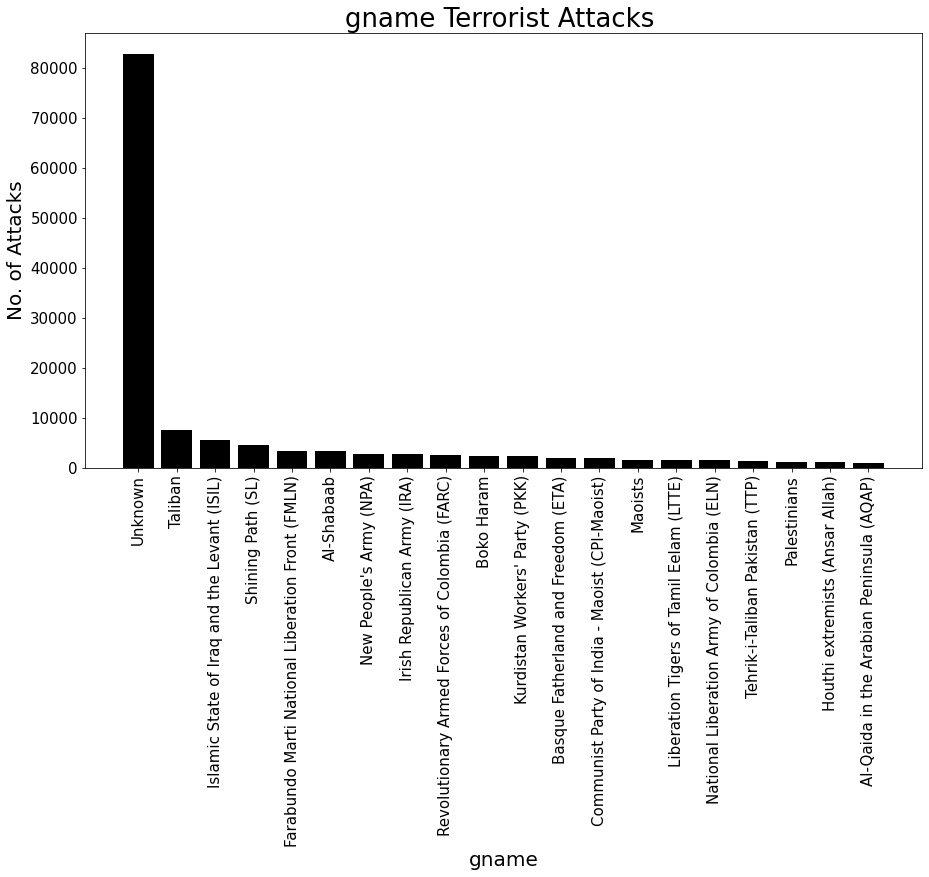

In [50]:
Barplot_Terrorist_attacks('gname','black')

In [52]:
# Label Encoding : Converting Categorical data to numerical data

In [53]:
def get_Count_of_duplication_of_all_Values(ColumnName):
    dup_val=GT_data.pivot_table(index=[ColumnName],aggfunc='size')
    dup_val=dup_val.sort_values(ascending=False)
    return dup_val

## DATABASE SOURCE

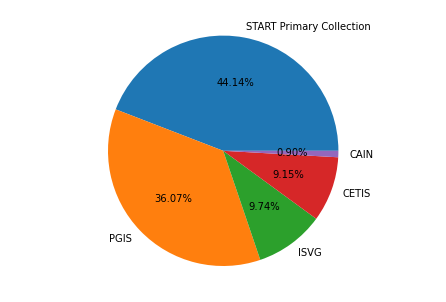

In [54]:
#Barplot_Terrorist_attacks('dbsource','yellow')
dup_val=GT_data.pivot_table(index=['dbsource'],aggfunc='size')
dup_val=dup_val.sort_values(ascending=False)
dup_val=dup_val.head(5)
#plt.figure(figsize=(30,10))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(dup_val.values,labels = dup_val.index,autopct='%1.2f%%')
plt.show()

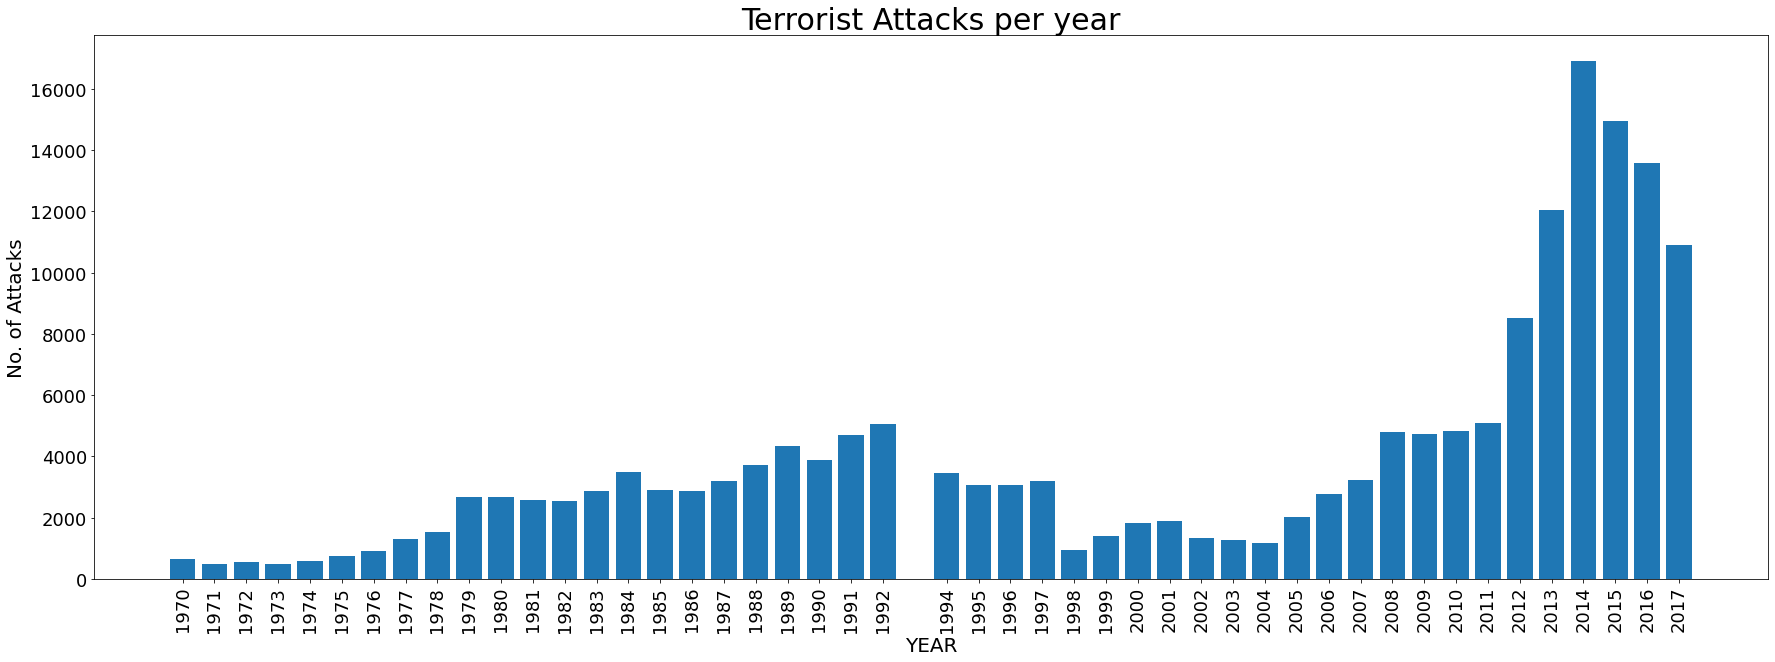

In [55]:
#Terrorist Attacks per year
year=get_Count_of_duplication_of_all_Values('iyear')
plt.figure(figsize=(30,10))
plt.bar(year.index,year.values)
plt.xticks(year.index,fontsize=18,rotation=90)
plt.yticks(fontsize=18)
plt.xlabel('YEAR',fontsize=20)
plt.ylabel('No. of Attacks',fontsize=20)
plt.title('Terrorist Attacks per year',fontsize=30)
plt.show()


# Converting Categorical to numerical

In [56]:
le = LabelEncoder()
cols=['provstate',
'city',
'corp1',
'target1',
'gname']

for i in cols:
    le.fit(GT_data[i])
    GT_data[i]=le.transform(GT_data[i])
    

In [57]:
def get_Original_value_Of_encodedValue(ColName,EncodedValue):
    x=GT_data[ColName][GT_data[ColName]==EncodedValue].index
    originalvalue=le.inverse_transform(GT_data[ColName])
    print('Original Value is:'+str(originalvalue[x[0]]))

get_Original_value_Of_encodedValue('gname',8)

Original Value is:1st of May Group


In [58]:
GT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181691 non-null  int64  
 10  city              181691 non-null  int64  
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

# Percentages

In [59]:
GT_data['success'].sum()/GT_data.shape[0]*100

88.95982739926579

In [60]:
GT_data.head(2)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,2622,29806,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,31004,40137,58.0,Dominican Republic,1907,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,782,22166,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",4294,48243,21.0,Belgium,13,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,PGIS,0,1,1,1


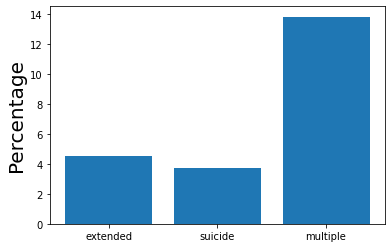

In [61]:
def get_percentage(ColName):
    return round(GT_data[ColName].sum()/GT_data.shape[0]*100,1)
aaa=['extended','suicide','multiple']
bbb=[]
for i in aaa:
    bbb.append(get_percentage(i))
plt.bar(aaa,bbb)
plt.ylabel('Percentage',fontsize=20)
plt.show()

# Heat Map

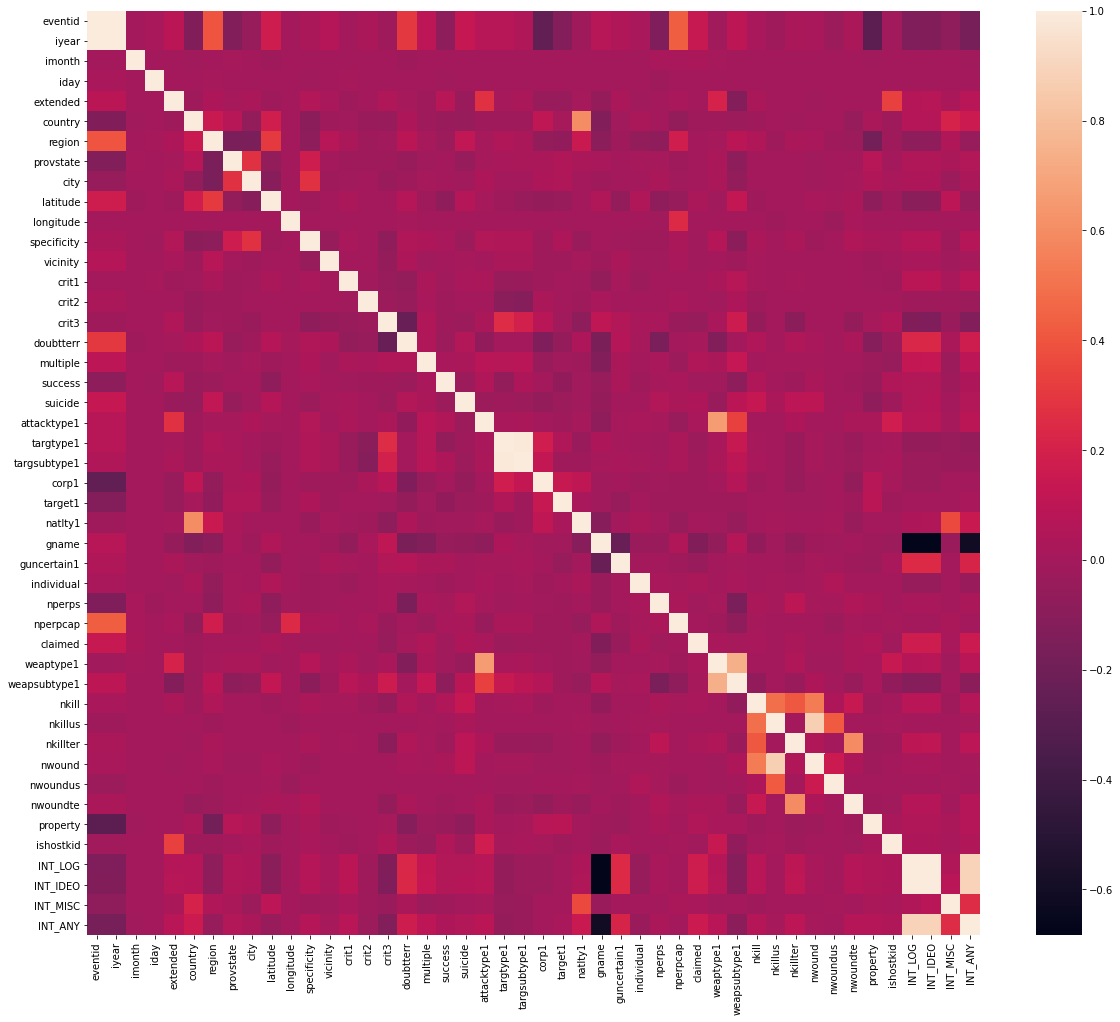

In [62]:
Corr = GT_data.corr()
plt.figure(figsize=(20,17))
sn.heatmap(Corr)

In [63]:
GT_data[['nkill','nwound']].sort_values(by='nkill',ascending=False).head(10)

,nkill,nwound
133518,1570.0,NaN
73126,1384.0,8190.0
73127,1383.0,8191.0
55934,1180.0,0.0
136283,953.0,NaN
133225,670.0,0.0
179671,588.0,316.0
76347,518.0,216.0
136746,517.0,NaN
170198,433.0,NaN


# GeoMaps

In [64]:
BBox=((GT_data['longitude'].min(),   GT_data['longitude'].max(),      
         GT_data['latitude'].min(), GT_data['latitude'].max()))
BBox

(-86185896.0, 179.366667, -53.154613, 74.633553)

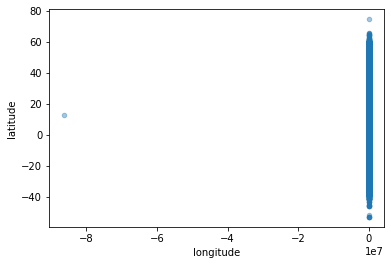

In [65]:
GT_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)


In [97]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import plotly.express as px
from shapely import wkt

In [116]:
df = gpd.GeoDataFrame(GT_data.head(15000),geometry=gpd.points_from_xy(GT_data.longitude.head(15000),GT_data.latitude.head(15000)))
df.head(2)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,geometry
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,2622,29806,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,31004,40137,58.0,Dominican Republic,1907,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,PGIS,0,0,0,0,POINT (-69.95116 18.45679)
1,197000000002,1970,0,0,0,130,Mexico,1,North America,782,22166,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",4294,48243,21.0,Belgium,13,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,PGIS,0,1,1,1,POINT (-99.08662 19.37189)


In [76]:
#get built in dataset from geo
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Text(0.5, 1.0, 'Terrorist Attacks world wide')

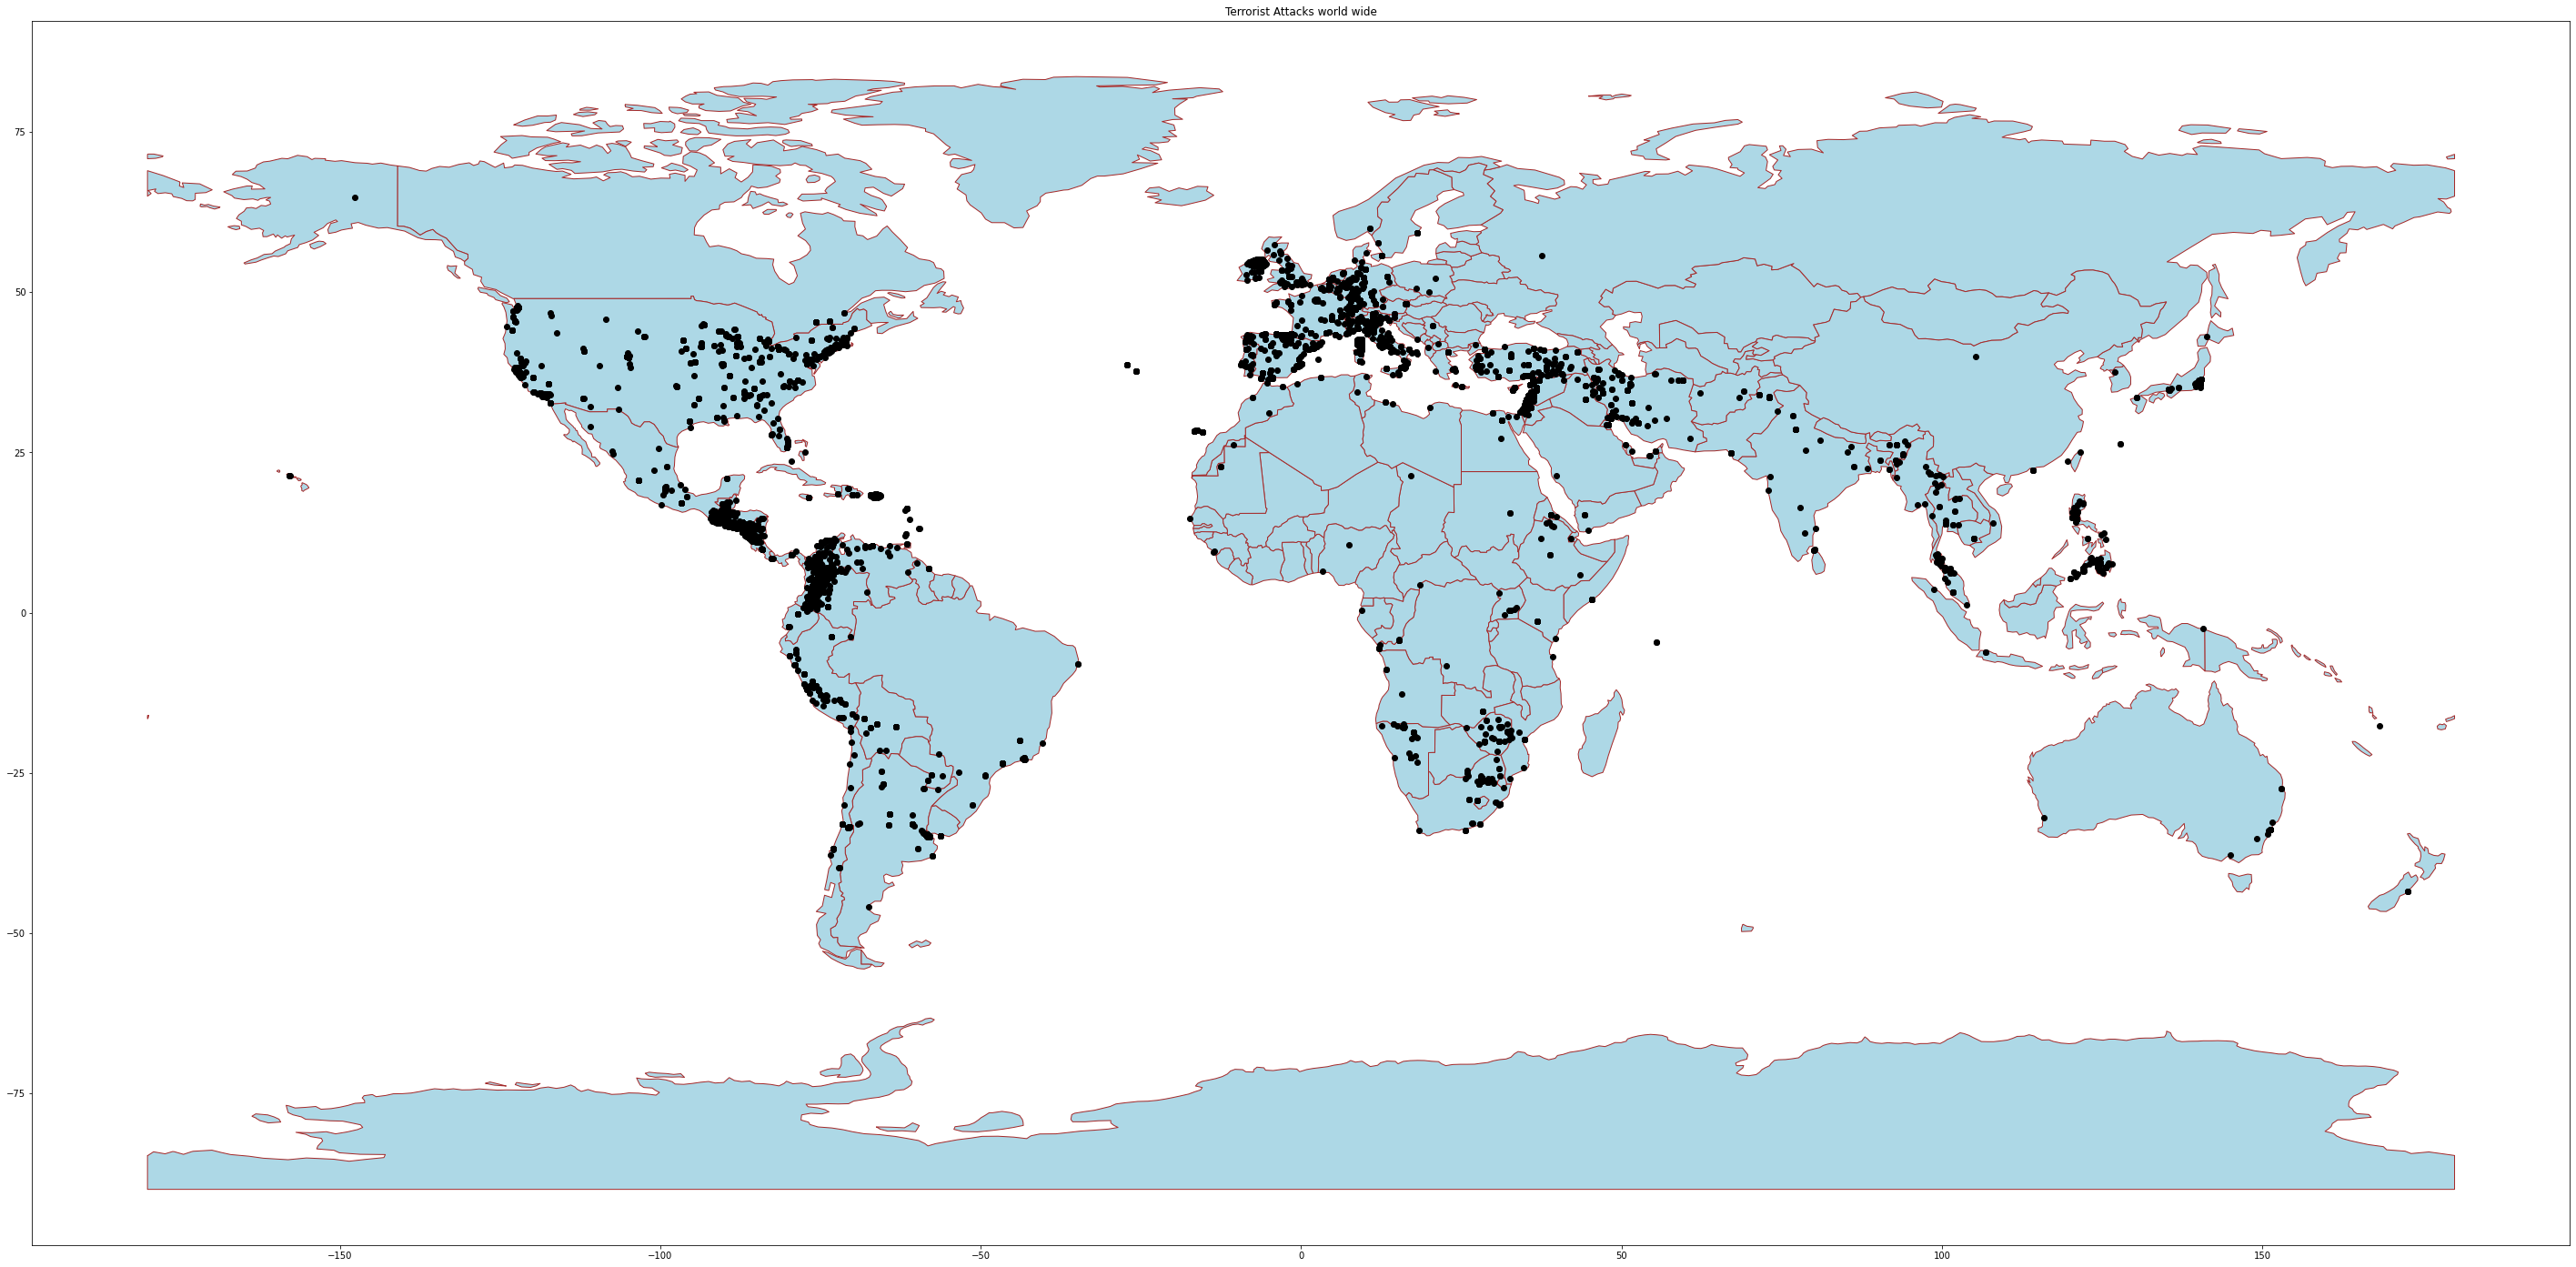

In [117]:
#plot world map
ax=world_data.plot(color='lightblue',edgecolor='brown',figsize=(50,50))

df.plot(ax=ax,color='black',figsize=(20,20))
plt.title('Terrorist Attacks world wide')


Text(0.5, 1.0, 'Terrorist Attacks world wide')

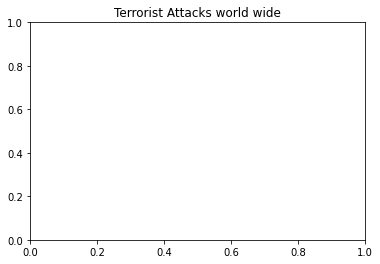